# Introdução
## Objetivo:
Otimizar um modelo de rede neural pré-treinado para detecção de fraudes em cartões de crédito. Aplicar técnicas avançadas de ajuste fino de hiperparâmetros, como grid search e random search, com o objetivo de aprimorar as métricas de desempenho do modelo, incluindo
* precisão
* recall
* F1-score
* AUC-ROC

A atividade também exige uma comparação entre o modelo otimizado e o modelo original, permitindo avaliar o impacto das modificações nos hiperparâmetros sobre o desempenho geral.

## Instruções:

Para realizar esta atividade, você deve começar treinando o modelo de rede neural para detecção de fraudes em cartões de crédito. Os dados do cartão podem ser encontrados no link de conteúdo. Depois, obtenha as métricas de desempenho deste modelo como a precisão, recall, F1-score e AUC-ROC.  


Em seguida, defina uma faixa de valores para os hiperparâmetros que deseja otimizar. Aplique técnicas de ajuste fino de hiperparâmetros para melhorar o desempenho do modelo. Você pode usar métodos como grid search e random search para encontrar as melhores combinações de hiperparâmetros.


Após otimizar o modelo, compare os resultados obtidos com os resultados do modelo original. Analise como as mudanças nos hiperparâmetros impactaram o desempenho, considerando cada uma das métricas mencionadas. Por fim, documente todas as etapas realizadas e as observações feitas durante o processo.

## Links de apoio:
- [Repositório do Github](https://github.com/VitorMoura01/Classificacao-Fraudes-Cartao)
- [Dataset Kaggle](https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card/data)

*Vitor Moura - T4G1*

# Preparação do ambiente 🏡

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 11.8 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 93.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import pandas as pd
import dask.dataframe as dd
from dask import delayed, compute
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.layers import Input
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/M11/creditcard.csv')

In [ ]:
dtypes_dict = {
    'Time': 'float64',
    'V1': 'float64',
    'V2': 'float64',
    'V3': 'float64',
    'V4': 'float64',
    'V5': 'float64',
    'V6': 'float64',
    'V7': 'float64',
    'V8': 'float64',
    'V9': 'float64',
    'V10': 'float64',
    'V11': 'float64',
    'V12': 'float64',
    'V13': 'float64',
    'V14': 'float64',
    'V15': 'float64',
    'V16': 'float64',
    'V17': 'float64',
    'V18': 'float64',
    'V19': 'float64',
    'V20': 'float64',
    'V21': 'float64',
    'V22': 'float64',
    'V23': 'float64',
    'V24': 'float64',
    'V25': 'float64',
    'V26': 'float64',
    'V27': 'float64',
    'V28': 'float64',
    'Amount': 'float64',
    'Class': 'float64'
}

In [ ]:
# df = dd.read_csv('/content/drive/MyDrive/creditcard.csv', dtype=dtypes_dict)
df = dd.read_csv('/content/drive/MyDrive/M11/creditcard.csv', dtype=dtypes_dict)

# Análise exploratória 🔍

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df['Class'].value_counts().compute()

,count
Class,
0.0,284315
1.0,492


<Axes: xlabel='Class'>

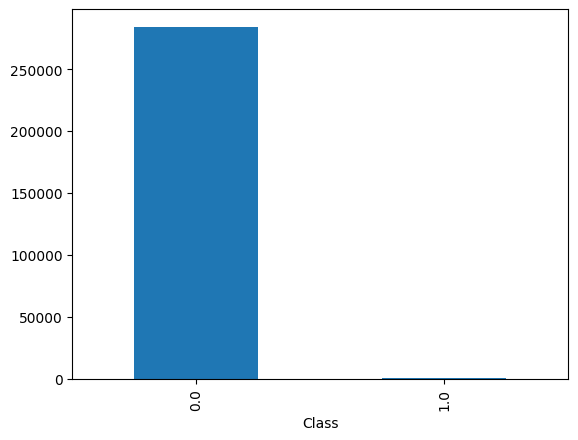

In [ ]:
df['Class'].value_counts().compute().plot(kind='bar')

Os dados estão desequilibrados, pois as classificações fraudulentas representam apenas 0,1%, então mesmo que o modelo classifique todas os registros como não fraudulentas, obteriamos uma acurácia de 99%. Para corrigir isso podemos usar uma métrica como recall

In [ ]:
print(df.isnull().sum().compute())
print(df.describe().compute())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.321107e-16 -1.430631e-15  2.082079e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     38202.000000 -7.982587e-01 -5.597343e-01 -6.769833e-01 -7.180230e-01   
50%     70179.000000  1.092398e-01  1.062315e-01  1.937401e-01  1.643563e-01   
75%    123474.250000  1.158484e+00  8.217941e-01  1.363

In [ ]:
df_boxplot = df[['Class', 'Amount', 'Time', 'V1']]
df_boxplot.head()

,Class,Amount,Time,V1
0,0.0,149.62,0.0,-1.359807
1,0.0,2.69,0.0,1.191857
2,0.0,378.66,1.0,-1.358354
3,0.0,123.50,1.0,-0.966272
4,0.0,69.99,2.0,-1.158233


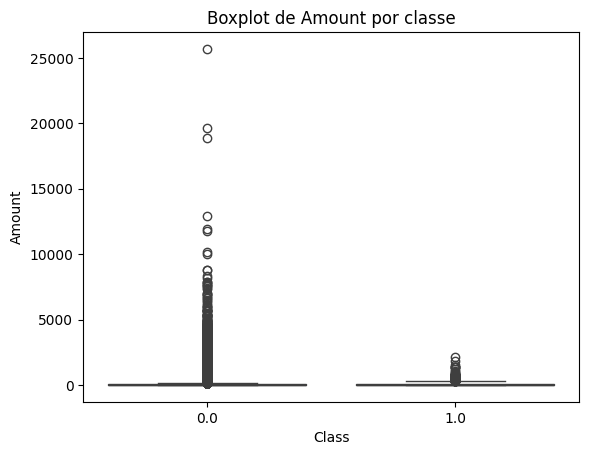

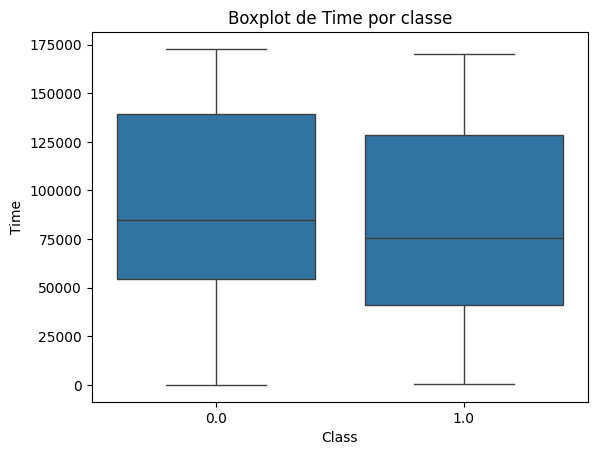

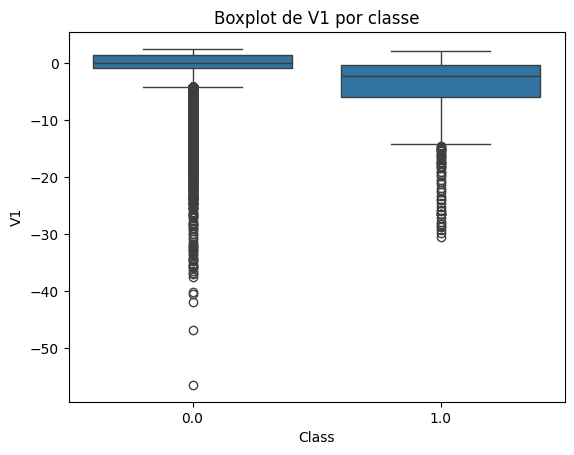

In [ ]:
for column in df_boxplot.columns:
  if column != 'Class':
    plt.figure()
    sns.boxplot(x='Class', y=column, data=df_boxplot.compute())
    plt.title(f'Boxplot de {column} por classe')

# Tratamento dos dados

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.compute(), y.compute())

balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Class'] = y_resampled

X_balanced = df.drop('Class', axis=1).compute()
y_balanced = df['Class'].compute()


In [ ]:
df.compute().shape

(284807, 31)

In [ ]:
balanced_df['Class'].value_counts()

,count
Class,
0.0,284315
1.0,284315


In [ ]:
df['Class'].value_counts().compute()

,count
Class,
0.0,284315
1.0,492


# Treinamento do modelo 🧠

## Enunciado
Desenvolva um modelo sequencial em Keras com uma única camada Dense, utilizando uma unidade com a função de ativação sigmoid. Compile o modelo utilizando o otimizador adam, a função de perda binary_crossentropy, e a métrica accuracy. Inclua também a métrica F1 para uma avaliação mais completa, e explique brevemente a função de cada um desses componentes no treinamento. Treine o modelo por 50 épocas com um batch size de 10.

- Otimizador adam: Um algoritmo de otimização baseado em gradiente que ajusta os pesos do modelo para minimizar a função de perda.
- binary_crossentropy: Calcula o erro entre as previsões do modelo e os rótulos verdadeiros em problemas de classificação binária.
- accuracy: Mede a porcentagem de previsões corretas feitas pelo modelo.
- Precision: Mede a proporção de verdadeiros positivos entre as amostras classificadas como positivas.
- Recall: Mede a proporção de verdadeiros positivos que foram corretamente identificados pelo modelo.

Nessa parte do código o modelo é 'compilado', o que significa a definição de sua arquitetura

In [ ]:
X_balanced.shape

(284807, 30)

In [ ]:
y_balanced.shape

(284807,)

In [ ]:
y_balanced.value_counts()

,count
Class,
0.0,284315
1.0,492


Nessa parte do código o dataset é dividido em treino (x_train, y_train) e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


In [ ]:
model_base = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_base = model_base.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9956 - loss: 20.4559 - val_accuracy: 0.9982 - val_loss: 2.0100
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9960 - loss: 3.3843 - val_accuracy: 0.9982 - val_loss: 1.1439
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9965 - loss: 1.0183 - val_accuracy: 0.9982 - val_loss: 0.9133
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9960 - loss: 0.6964 - val_accuracy: 0.9984 - val_loss: 0.5775
Epoch 5/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9972 - loss: 0.2444 - val_accuracy: 0.9983 - val_loss: 0.0159
Epoch 6/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9981 - loss: 0.0348 - val_accuracy: 0.9983 - val_loss: 0.0128
Epoch 7/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9983 - loss: 0.0201 - val_accuracy: 0.9983 - val_loss: 0.0129
Epoch 8/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9979 - loss: 

## Otimização

In [ ]:
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', activation='relu'):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

Como usar GridSearch com keras wrapper: https://stackoverflow.com/a/76906555

In [ ]:
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu'],
}
scorers = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorers, refit='roc_auc', n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = 

In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'batch_size': 64, 'epochs': 20, 'model__activation': 'relu', 'model__optimizer': 'rmsprop'}
0.7855491648534096


Os melhores hiperparâmetros para o modelo são batch size de 30, treinamento por 20 épocas, e em sua arquitetura, a função de ativação RelU. O melhor otimizador da lista apresentada ao GridSearch foi o RMSPROP

# Avaliação do modelo 🧾

## Enunciado
 Após o treinamento, utilize o modelo para prever os rótulos do conjunto de teste e calcule tanto a acurácia quanto a métrica F1. Interprete os resultados, discutindo o desempenho do modelo e possíveis melhorias.

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
f1 = recall_score(y_train, y_pred)

print("Acurácia:", accuracy)
print("F1 Score:", f1)

Acurácia: 0.9988097202667069
F1 Score: 0.6062717770034843

In [ ]:
# prompt: obtenha as métricas de desempenho deste modelo como a recall e AUC-ROC.

from sklearn.metrics import recall_score, roc_auc_score

# Fazendo previsões no conjunto de teste
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculando o recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculando a AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_roc)


Uma acurácia boa pode ser enganosa por conta do desbalanceamento dos dados. O F1 Score, por outro lado, fornece uma medida mais verdadeira do desempenho do modelo, considerando tanto a precisão quanto o recall.

## Possíveis melhorias
- Reamostragem para lidar com o desbalanceamento dos dados (oversampling ou undersampling).
- Experimentar outras arquiteturas de rede neural, como + camadas ocultas e variando o número de neurônios.
- Ajustar os hiperparâmetros do modelo, como a taxa de aprendizado e o número de épocas.